In [65]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split_test_split

In [2]:
from keras.datasets import boston_housing

In [3]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

In [5]:
x_train.shape

(404, 13)

In [6]:
y_train.shape

(404,)

In [8]:
x_test.shape

(102, 13)

In [13]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [18]:
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [50]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01),input_dim=13))
model.add(Dense(5,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))
model.add(Dense(1,activation="linear",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss="mse",optimizer=SGD(learning_rate=0.1),metrics=["mse"])
history=model.fit(x_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

In [53]:
history=model.fit(x_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
37/37 [==============================] - 5s 34ms/step - loss: 91.7840 - mse: 90.5490 - val_loss: 15.2095 - val_mse: 13.6504
Epoch 2/20
37/37 [==============================] - 0s 7ms/step - loss: 43.3596 - mse: 41.5261 - val_loss: 33.1201 - val_mse: 30.7530
Epoch 3/20
37/37 [==============================] - 0s 7ms/step - loss: 39.0708 - mse: 36.5013 - val_loss: 21.3951 - val_mse: 18.6754
Epoch 4/20
37/37 [==============================] - 0s 11ms/step - loss: 29.7310 - mse: 26.9947 - val_loss: 41.1280 - val_mse: 38.3124
Epoch 5/20
37/37 [==============================] - 1s 14ms/step - loss: 26.4414 - mse: 23.5798 - val_loss: 21.6114 - val_mse: 18.5837
Epoch 6/20
37/37 [==============================] - 0s 13ms/step - loss: 24.8902 - mse: 21.8444 - val_loss: 110.2380 - val_mse: 106.8974
Epoch 7/20
37/37 [==============================] - 1s 25ms/step - loss: 34.3183 - mse: 30.9851 - val_loss: 30.6176 - val_mse: 27.0751
Epoch 8/20
37/37 [==============================] - 1s 

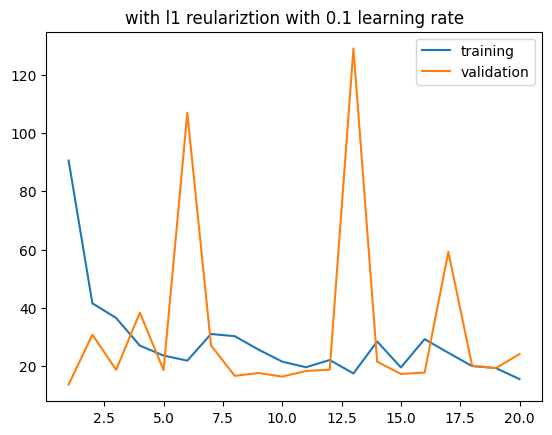

In [54]:
plt.plot(range(1,21),history.history["mse"],label="training")
plt.plot(range(1,21),history.history["val_mse"],label="validation")
plt.title("with l1 reulariztion with 0.1 learning rate")
plt.legend()

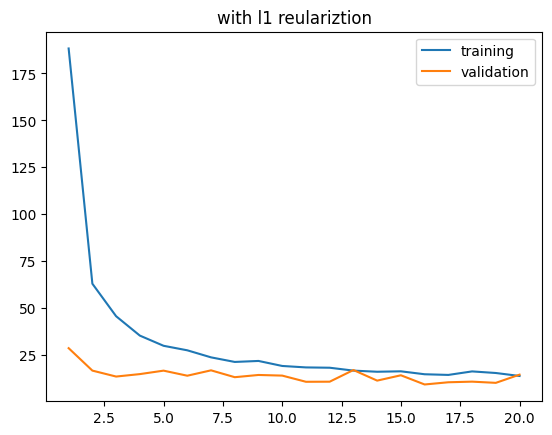

In [42]:
plt.plot(range(1,21),history.history["mse"],label="training")
plt.plot(range(1,21),history.history["val_mse"],label="validation")
plt.title("with l1 reulariztion")
plt.legend()

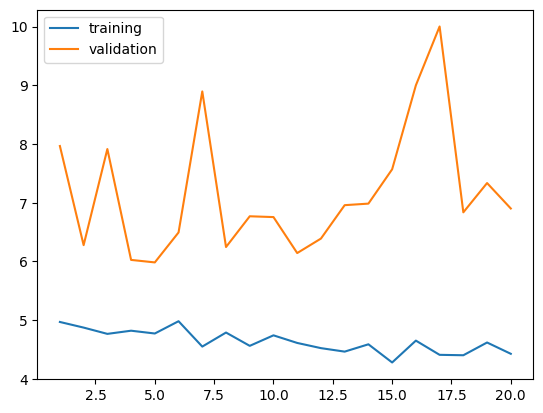

In [30]:
plt.plot(range(1,21),history.history["mse"],label="training")
plt.plot(range(1,21),history.history["val_mse"],label="validation")
plt.legend()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,model.predict(x_testp))

4/4 [==============================] - 0s 4ms/step


21.427204431446498

In [58]:
data=pd.read_csv(r"C:\Users\LENOVO\Desktop\1.ushape.csv",header=None)

In [59]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [61]:
x=data.iloc[:,0:2]
y=data.iloc[:,2].astype(int)

In [66]:
x.shape

(100, 2)

In [63]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

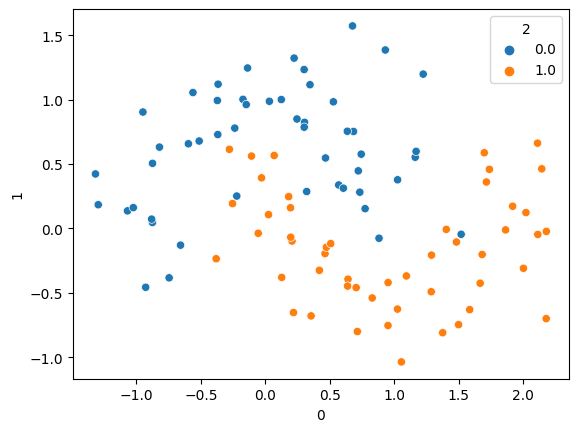

In [64]:
sns.scatterplot(data=data,x=0,y=1,hue=2)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [68]:
x_train.shape

(90, 2)

In [69]:
x_test.shape

(10, 2)

In [70]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [75]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

In [76]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 5s 75ms/step - loss: 1.0038 - accuracy: 0.5432 - val_loss: 0.6276 - val_accuracy: 0.8889
Epoch 2/20
17/17 [==============================] - 0s 19ms/step - loss: 0.6370 - accuracy: 0.8395 - val_loss: 0.5994 - val_accuracy: 0.8889
Epoch 3/20
17/17 [==============================] - 0s 23ms/step - loss: 0.6025 - accuracy: 0.8395 - val_loss: 0.4723 - val_accuracy: 0.8889
Epoch 4/20
17/17 [==============================] - 0s 22ms/step - loss: 0.5687 - accuracy: 0.8519 - val_loss: 0.4274 - val_accuracy: 0.8889
Epoch 5/20
17/17 [==============================] - 0s 17ms/step - loss: 0.5600 - accuracy: 0.8642 - val_loss: 0.4352 - val_accuracy: 0.8889
Epoch 6/20
17/17 [==============================] - 0s 23ms/step - loss: 0.5495 - accuracy: 0.8642 - val_loss: 0.5080 - val_accuracy: 0.8889
Epoch 7/20
17/17 [==============================] - 0s 21ms/step - loss: 0.5440 - accuracy: 0.8642 - val_loss: 0.4191 - val_accuracy: 0.8889
Epoch 8/20
17

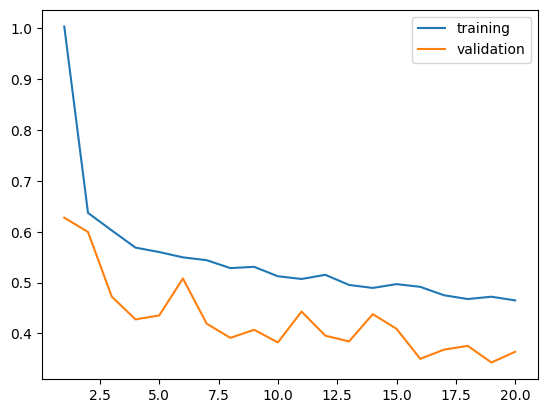

In [77]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

In [81]:
#pip install mlxtend

In [82]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 59s 6ms/step


<Axes: >

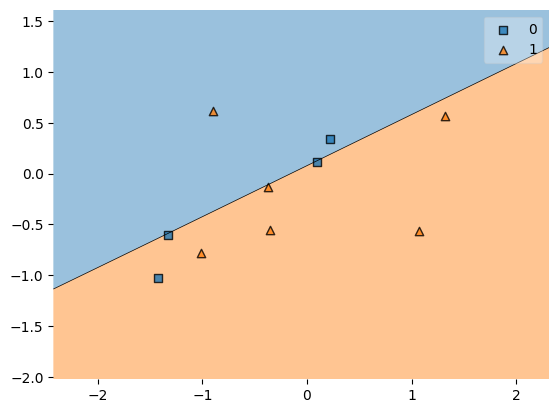

In [87]:
plot_decision_regions(x_testp,y_test.values,clf=model)

In [85]:
y_train.values

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1])